In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fakenews-detect/WELFake_Dataset.csv


In [2]:
# ======================== 1. Imports ========================
import pandas as pd #used for reading and manipulating structured data 
import numpy as np #for numerical operations, and provide support for arrays
import re #regular expression for test cleaning, used to search/replace patterns in text (used later in text cleaning)
import nltk #natural language toolkit for text preprocessing (tokenization, stopwords, lemmatization)
import matplotlib.pyplot as plt #for visualisation
import seaborn as sns #for visualisation more attractive and higher level API build on Matplotlib
from collections import Counter #counts frequency of elements in a list, later used for word frequency
!pip install wordcloud 
from wordcloud import WordCloud #visually show most frequent words in text as a cloud image 

# ML & Evaluation imports
!pip install scikit-learn-intelex --upgrade --quiet
!pip install scikit-learn-intelex #installs intel extensions for scikit-learn (optimizes ML algorithms to rrun faster on intel CPU's)
from sklearnex import patch_sklearn 
patch_sklearn() #automatically accelerates scikit-learn estimators (e.g., Logistic Regression, RandomForest).
from sklearn.feature_extraction.text import TfidfVectorizer #Converts text to numeric features using TF-IDF (Term Frequency–Inverse Document Frequency)
from sklearn.model_selection import train_test_split #Splits data into training and testing sets.
from sklearn.linear_model import LogisticRegression #import model - logistic regression (linear classifier)
from sklearn.svm import SVC #import model - Support Vector Classifier (SVC) — linear kernel
from sklearn.ensemble import RandomForestClassifier #import model - Random Forest (ensemble decision trees)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc 
from sklearn.metrics import precision_score, recall_score, f1_score


# Text processing tools
# from autocorrect import Speller #Speller autocorrects misspelled words
from nltk.corpus import stopwords, wordnet #stopwords : Removes common words (the, is, etc), wordnet : For lemmatization POS tags
from nltk.stem.porter import PorterStemmer #for stemming : cuts words to root form (e.g., running → run).
from nltk.stem import WordNetLemmatizer #for lemmatization : Reduces words to dictionary form.
from nltk import pos_tag, word_tokenize #Tokenizes text and tags part-of-speech

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 56.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 MB 11.9 MB/s eta 0:00:0000:0100:01m


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
# ======================== 2. NLTK Setup ========================
nltk.download('stopwords') #Downloads a list of stopwords (commonly used words like "is", "the", "and", etc.) in various languages.
nltk.download('wordnet') #Downloads the WordNet lexical database. It’s used for lemmatization, synonym lookup, and exploring relationships between words.
nltk.download('omw-1.4') #Downloads Open Multilingual WordNet, which provides translations and multilingual support for WordNet data.
nltk.download('punkt') #Downloads the Punkt tokenizer models, which are used for sentence splitting and word tokenization.
nltk.download('averaged_perceptron_tagger') #Downloads a part-of-speech (POS) tagger model. It assigns grammatical tags like noun, verb, adjective to each word in a sentence.

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
# Printing the stopwords in english
print(stopwords.words())

['tyre', 'rreth', 'le', 'atyre', 'këta', 'megjithëse', 'kemi', 'per', 'ndonëse', 'dytë', 'pse', 'tha', 'aty', 'ndaj', 'ke', 'këtë', 'duhet', 'pa', 'perket', 'veç', 'ndonje', 'një', 'keshtu', 's', 'janë', 'jane', 'ti', 'ia', 'megjithese', 'prej', 'ishte', 'tjerë', 'ai', 'se', 'tillë', 'do', 'si', 'ja', 'tonë', 'keta', 'pastaj', 'ndersa', 'siç', 'unë', 'gjate', 'di', 'kësaj', 'cilin', 'kjo', 'dhënë', 'da', 'teper', 'ketij', 'ama', 'pasi', 'fjalë', 'kanë', 'vetem', 'za', 'd.m.th.', 'ose', 'pas', 'ndonjë', 'cila', 'ndodhur', 'dyte', 'ardhur', 'kësi', 'nga', 'vete', 'atij', 'ta', 'jenë', 'rendit', 'tane', 'keso', 'deri', 'tone', 'të', 'prandaj', 'bëjë', 'domethënë', 'dhe', 'qi', 'mirepo', 'tona', 'që', 'u', 'këtu', 'cilet', 'jene', 'tjere', 'gjë', 'së', 'gjatë', 'duhej', 't', 'dhene', 'thuhet', 'po', 'une', 'dy', 'cfare', 'ndërsa', 'sepse', 'edhe', 'cilen', 'to', 'meqenese', 'meje', 'tij', 'qene', 'jeni', 'them', 'përket', 'keto', 'ni', 'këso', 'asaj', 'ajo', 'sic', 'vetëm', 'ketyre', 'anda

In [5]:
# ======================== 3. Load Dataset ========================
news_dataset = pd.read_csv("/kaggle/input/fakenews-detect/WELFake_Dataset.csv") #Loads a CSV containing fake/real news with columns like title and label.

In [6]:
# Data Overview
print(news_dataset.info()) #Dataset info (dtypes, nulls)
print(news_dataset.describe()) #Statistical description
print(news_dataset.shape) #Shape (rows, columns)
news_dataset.head() #Displays first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None
         Unnamed: 0         label
count  72134.000000  72134.000000
mean   36066.500000      0.514404
std    20823.436496      0.499796
min        0.000000      0.000000
25%    18033.250000      0.000000
50%    36066.500000      1.000000
75%    54099.750000      1.000000
max    72133.000000      1.000000
(72134, 4)


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
# Quick check for missing values
print("Missing Values Before:\n", news_dataset.isnull().sum()) #Checks missing values
news_dataset = news_dataset.fillna('') #Replaces missing values with an empty string to avoid errors.
print("\nMissing Values After:\n", news_dataset.isnull().sum())

Missing Values Before:
 Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

Missing Values After:
 Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


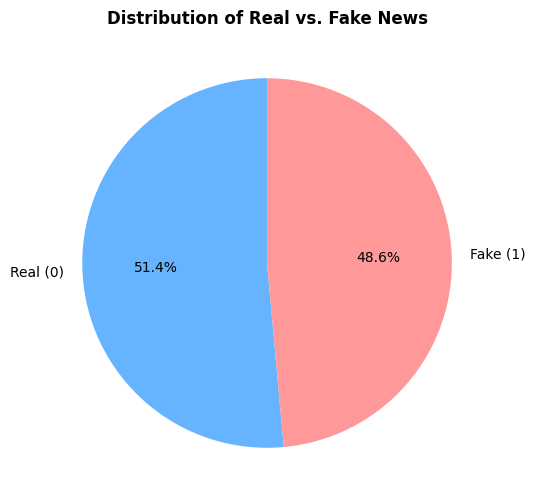

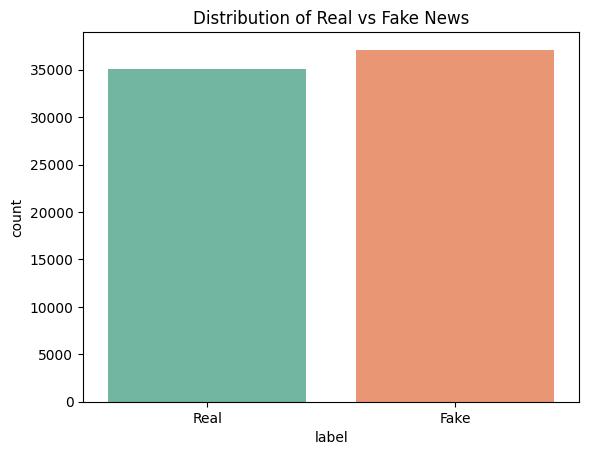

In [8]:
# Plotting label distribution
plt.figure(figsize=(6, 6))
labels = ['Real (0)', 'Fake (1)']
counts = news_dataset['label'].value_counts()
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Real vs. Fake News', fontweight='bold')
plt.show()

sns.countplot(data=news_dataset, x='label', palette='Set2')
plt.title('Distribution of Real vs Fake News')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()


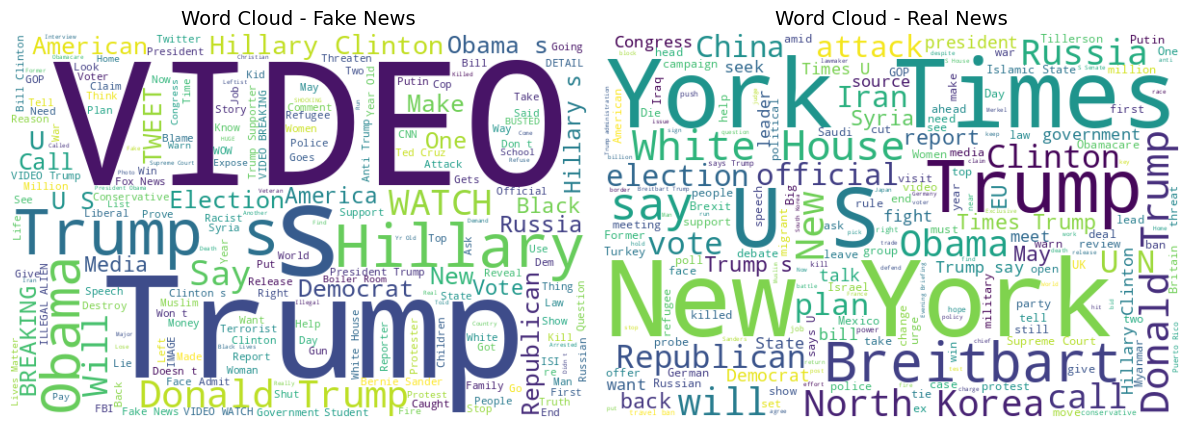

In [9]:
# Separate fake and real news
fake_news = news_dataset[news_dataset['label'] == 1]
real_news = news_dataset[news_dataset['label'] == 0]

# Join all text into one string
fake_words = ' '.join(fake_news['title'])
real_words = ' '.join(real_news['title'])

# Generate WordCloud
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wc_fake = WordCloud(width=600, height=400, background_color='white').generate(fake_words)
plt.imshow(wc_fake, interpolation='bilinear') #imshow - displays the image, interpolation='bilinear' smmoothens the image
plt.title("Word Cloud - Fake News", fontsize=14)
plt.axis('off')

plt.subplot(1, 2, 2)
wc_real = WordCloud(width=600, height=400, background_color='white').generate(real_words)
plt.imshow(wc_real, interpolation='bilinear')
plt.title("Word Cloud - Real News", fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.show()


In [10]:
# ======================== 4. Text Preprocessing ========================
!pip install autocorrect
from autocorrect import Speller
spell = Speller(lang='en')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Helper to get correct POS tag for lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 15.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=495e698867b44c13b34b5153b41d7cab8317ded3f1a4204eaf316d947716c449
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect


In [13]:
# Lemmatization pipeline
nltk.download('averaged_perceptron_tagger_eng')
def lemmatize_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    pos_tags = pos_tag(words)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized)

# Stemming pipeline
def stem_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed)

# Apply both processes
news_dataset['content_lemmatized'] = news_dataset['title'].apply(lemmatize_text)
news_dataset['content_stemmed'] = news_dataset['title'].apply(stem_text)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [14]:
# ======================== 5. TF-IDF Vectorization ========================
vectorizer_stem = TfidfVectorizer()
vectorizer_lem = TfidfVectorizer()

X_stemmed = news_dataset['content_stemmed']
X_stemmed = vectorizer_stem.fit_transform(X_stemmed)
X_lemmatized = news_dataset['content_lemmatized']
X_lemmatized = vectorizer_lem.fit_transform(X_lemmatized)
Y = news_dataset['label'].values

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


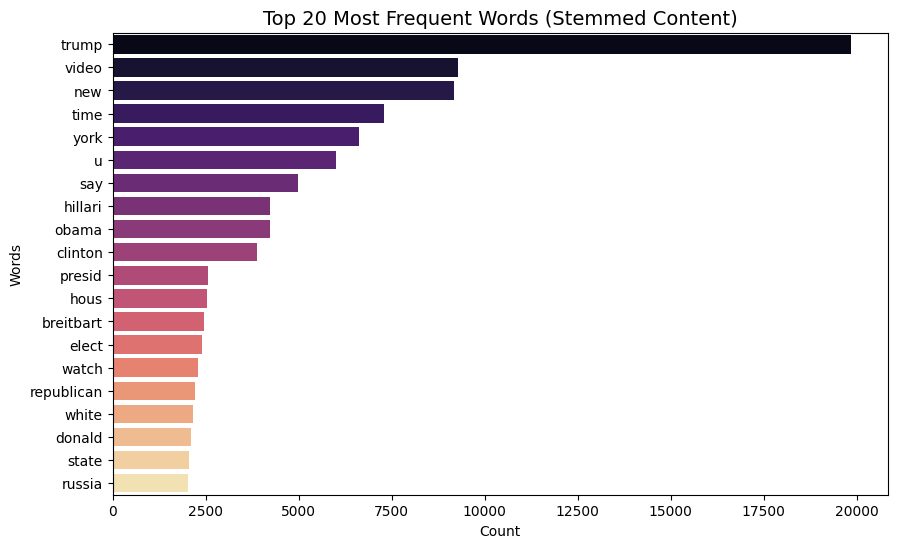

In [15]:
# Tokenize and collect words from both fake and real content
all_words = ' '.join(news_dataset['content_stemmed']).split()
word_freq = Counter(all_words) #Counter counts how many times each word appears in all_words. We get a dictionary-like object with word frequencies.

# Get top 20 most common words
common_words = word_freq.most_common(20)

# Prepare data
words = [item[0] for item in common_words]
counts = [item[1] for item in common_words]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='magma')
plt.title("Top 20 Most Frequent Words (Stemmed Content)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


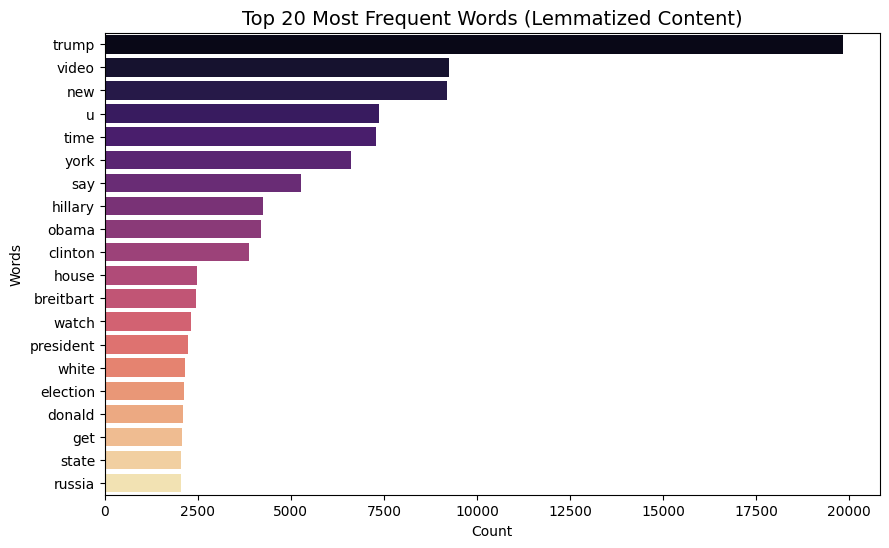

In [16]:
# Tokenize and collect words from both fake and real content
all_words = ' '.join(news_dataset['content_lemmatized']).split()
word_freq = Counter(all_words)

# Get top 20 most common words
common_words = word_freq.most_common(20)

# Prepare data
words = [item[0] for item in common_words]
counts = [item[1] for item in common_words]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words, palette='magma')
plt.title("Top 20 Most Frequent Words (Lemmatized Content)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()

In [17]:
# ======================== 6. Train-Test Split ========================
# Splitting the data for stemming
X_train_stem, X_test_stem, y_train, y_test = train_test_split(
    X_stemmed, Y, test_size=0.2, stratify=Y, random_state=42
)
#stratify=Y: Ensures the class distribution (e.g., real/fake ratio) remains consistent in both train and test sets.
#random_state=42: Ensures reproducibility. The same data split will happen every time you run the code.

# Splitting the data for lemmatization
X_train_lem, X_test_lem, _, _ = train_test_split(
    X_lemmatized, Y, test_size=0.2, stratify=Y, random_state=42
)

from collections import Counter
print("Label distribution in y_train:", Counter(y_train))
print("Label distribution in y_test:", Counter(y_test))

INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: fallback to original Scikit-learn
INFO:sklearnex: sklearn.model_selection.train_test_split: running accelerated version on CPU


Label distribution in y_train: Counter({1: 29685, 0: 28022})
Label distribution in y_test: Counter({1: 7421, 0: 7006})


In [18]:
# ======================== 7. Model Training & Evaluation ========================

# Logistic Regression
lr_stem = LogisticRegression(max_iter=1000)
#This line creates a Logistic Regression model instance called lr_stem.
#max_iter=1000: Sets the maximum number of iterations for the optimizer (used to converge to a solution) (default 100).

lr_stem.fit(X_train_stem, y_train)
y_pred_lr_stem = lr_stem.predict(X_test_stem)

lr_lem = LogisticRegression(max_iter=1000)
lr_lem.fit(X_train_lem, y_train)
y_pred_lr_lem = lr_lem.predict(X_test_lem)

INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
/usr/local/lib/python3.11/dist-packages/daal4py/sklearn/linear_model/logistic_path.py:628: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
INFO:sklearnex: sklearn.linear_model.LogisticRegression.fit: fallback to original Scikit-learn
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict: running accelerated version on

In [19]:
# SVM
svm_stem = SVC(kernel='linear', probability=True)
svm_stem.fit(X_train_stem, y_train)
y_pred_svm_stem = svm_stem.predict(X_test_stem)

svm_lem = SVC(kernel='linear', probability=True)
svm_lem.fit(X_train_lem, y_train)
y_pred_svm_lem = svm_lem.predict(X_test_lem)

#SVC (Support Vector Classification): This initializes a support vector machine (SVM) model for classification. 
#It’s one of the most powerful classification algorithms used in machine learning.

#kernel='linear': The kernel specifies the function that transforms the data into a higher-dimensional space where 
#it becomes easier to separate the classes. A linear kernel means that we are trying to separate the classes with a 
#straight line (or hyperplane in higher dimensions).

#probability=True: By default, SVM doesn't output probabilities for each class. 
#Setting probability=True allows the model to return probabilities for the classes, using a method called Platt scaling.

# Linear Kernel
#The linear kernel is the simplest and is used when the data is already linearly separable, 
#meaning that the classes can be separated by a straight line (or hyperplane in higher dimensions). 
#This kernel doesn't transform the data and operates in the original feature space.

# Polynomial Kernel
#The polynomial kernel allows the SVM to fit a non-linear decision boundary by using a polynomial function. 
#The degree controls the flexibility of the decision boundary. Higher degrees make the decision boundary more flexible.

#Radial Basis Function (RBF) Kernel (Gaussian Kernel)
#The RBF kernel (also known as the Gaussian kernel) is the most commonly used kernel. 
#It can handle cases where the decision boundary is highly non-linear by mapping the data into an infinite-dimensional space. 
#The y parameter controls the smoothness of the decision boundary.
#default kernel in many SVM implementations and is highly flexible, making it useful in most cases.

#Sigmoid Kernel (Hyperbolic Tangent Kernel)
#The sigmoid kernel uses the hyperbolic tangent function. It's inspired by the activation function used in neural networks. 
#It can produce results similar to a neural network model, but its performance tends to be more sensitive to the choice of hyperparameters.

INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.fit: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.decision_function: running accelerated version on CPU
INFO:s

In [20]:
# Random Forest
rf_stem = RandomForestClassifier(n_estimators=100,max_depth=200 ,random_state=42)
rf_stem.fit(X_train_stem, y_train)
y_pred_rf_stem = rf_stem.predict(X_test_stem)

rf_lem = RandomForestClassifier(n_estimators=100,max_depth=200, random_state=42)
rf_lem.fit(X_train_lem, y_train)
y_pred_rf_lem = rf_lem.predict(X_test_lem)

#RandomForestClassifier: This initializes a Random Forest model for classification. 
#Random Forest is an ensemble learning method that creates a collection of decision trees and merges them to get a more accurate and stable prediction.
#n_estimators=100: This parameter specifies the number of decision trees in the Random Forest. 
#In this case, 100 trees will be trained on the data. More trees generally lead to better performance but also increase the computation time.
#random_state=42: This is the seed for random number generation. 
#Setting a random state ensures reproducibility, meaning that the results you get will be the same each time you run the code, 
#assuming all other conditions remain constant.
# Maximum Depth of the Trees (max_depth)
#What it does: This parameter limits how deep each decision tree can go. 
#If not set, the trees grow until they reach pure leaf nodes or the minimum samples required to split a node.
#Potential change: Limiting the depth of the trees can prevent overfitting. 
#If the trees are too deep, they might memorize the training data rather than learning general patterns.


INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.fit: fallback to original Scikit-learn. All input data transferred to host for further backend computations.
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running

In [21]:
# ======================== 8. Classification Reports ========================
acc_lr_stem = accuracy_score(y_test, y_pred_lr_stem)
print("Logistic Regression (Stemming)")
print(f"Accuracy: {acc_lr_stem:.2%}")
print("Logistic Regression (Stemming):\n", classification_report(y_test, y_pred_lr_stem))
acc_lr_lem = accuracy_score(y_test, y_pred_lr_lem)
print("Logistic Regression (Lemmatization)")
print(f"Accuracy: {acc_lr_lem:.2%}")
print("Logistic Regression (Lemmatization):\n", classification_report(y_test, y_pred_lr_lem))

acc_svm_stem = accuracy_score(y_test, y_pred_svm_stem)
print("SVM (Stemming)")
print(f"Accuracy: {acc_svm_stem:.2%}")
print("SVM (Stemming):\n", classification_report(y_test, y_pred_svm_stem))
acc_svm_lem = accuracy_score(y_test, y_pred_svm_lem)
print("SVM (Lemmatization)")
print(f"Accuracy: {acc_svm_lem:.2%}")
print("SVM (Lemmatization):\n", classification_report(y_test, y_pred_svm_lem))

acc_rf_stem = accuracy_score(y_test, y_pred_rf_stem)
print("Random Forest (Stemming)")
print(f"Accuracy: {acc_rf_stem:.2%}")
print("Random Forest (Stemming):\n", classification_report(y_test, y_pred_rf_stem))
acc_rf_lem = accuracy_score(y_test, y_pred_rf_lem)
print("Random Forest (Lemmatization)")
print(f"Accuracy: {acc_rf_lem:.2%}")
print("Random Forest (Lemmatization):\n", classification_report(y_test, y_pred_rf_lem))

Logistic Regression (Stemming)
Accuracy: 87.00%
Logistic Regression (Stemming):
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7006
           1       0.87      0.88      0.87      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427

Logistic Regression (Lemmatization)
Accuracy: 86.86%
Logistic Regression (Lemmatization):
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7006
           1       0.87      0.88      0.87      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427

SVM (Stemming)
Accuracy: 89.67%
SVM (Stemming):
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      7006
           1    

In [22]:
# ==================== Training and Saving Models ====================

# Save your vectorizers
from joblib import dump

# Save the trained vectorizers
dump(vectorizer_stem, 'vectorizer_stem.joblib')
dump(vectorizer_lem, 'vectorizer_lem.joblib')

# Save the trained models
dump(lr_stem, 'lr_stem_model.joblib')
dump(lr_lem, 'lr_lem_model.joblib')

dump(svm_stem, 'svm_stem_model.joblib')
dump(svm_lem, 'svm_lem_model.joblib')

dump(rf_stem, 'rf_stem_model.joblib')
dump(rf_lem, 'rf_lem_model.joblib')

print("All models and vectorizers saved successfully!")

All models and vectorizers saved successfully!


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


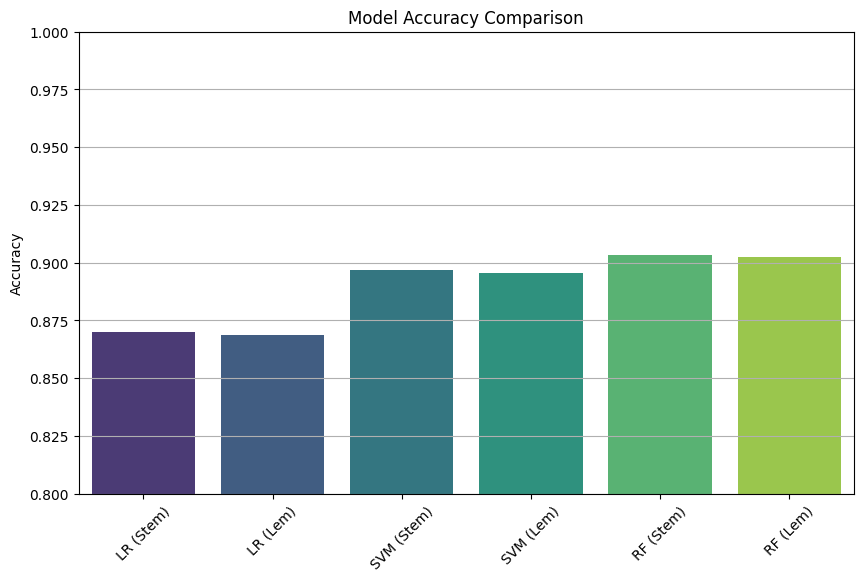

In [23]:
accuracies = [
    accuracy_score(y_test, y_pred_lr_stem),
    accuracy_score(y_test, y_pred_lr_lem),
    accuracy_score(y_test, y_pred_svm_stem),
    accuracy_score(y_test, y_pred_svm_lem),
    accuracy_score(y_test, y_pred_rf_stem),
    accuracy_score(y_test, y_pred_rf_lem)
]
models = [
    'LR (Stem)', 'LR (Lem)', 'SVM (Stem)', 'SVM (Lem)',
    'RF (Stem)', 'RF (Lem)'
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()

<Figure size 600x600 with 0 Axes>

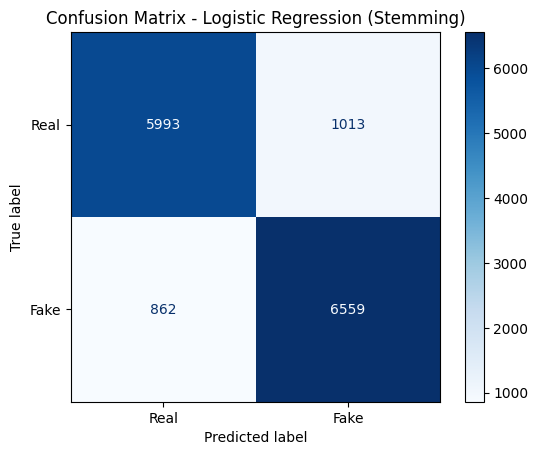

<Figure size 600x600 with 0 Axes>

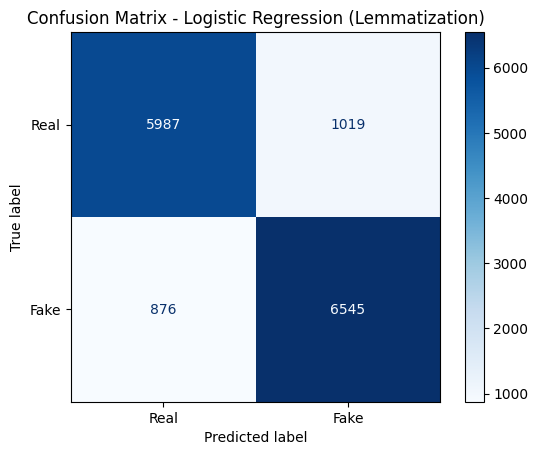

<Figure size 600x600 with 0 Axes>

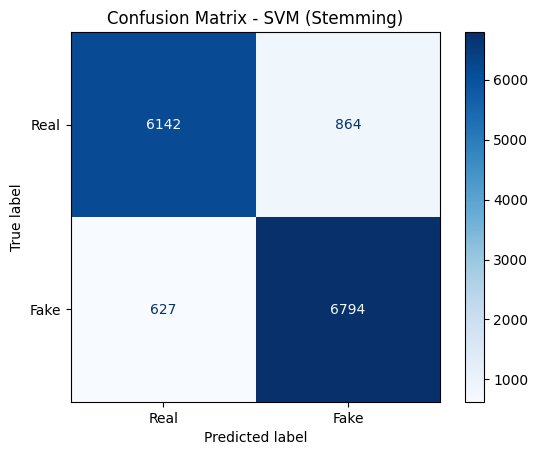

<Figure size 600x600 with 0 Axes>

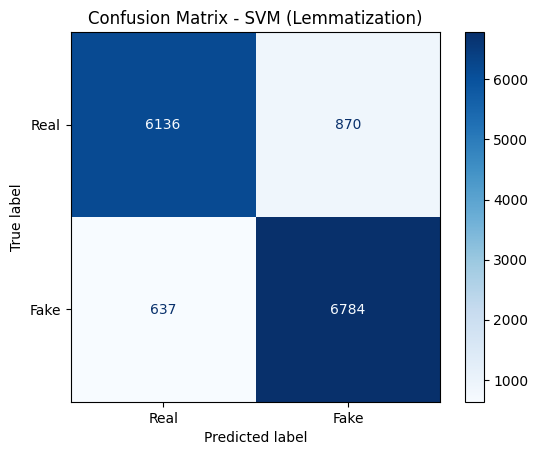

<Figure size 600x600 with 0 Axes>

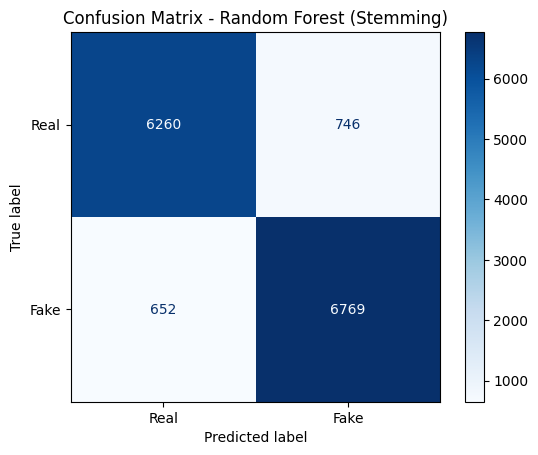

<Figure size 600x600 with 0 Axes>

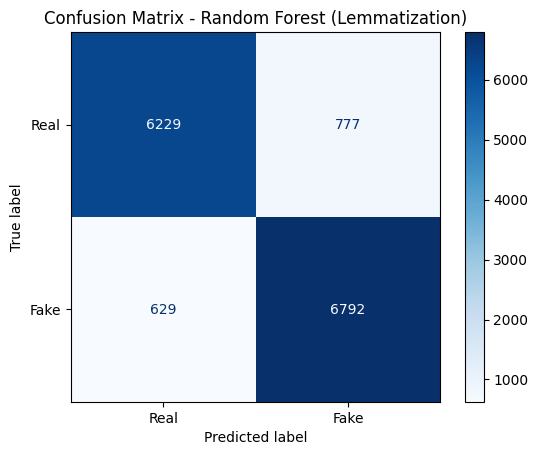

In [24]:
# ======================== 9. Confusion Matrices ========================

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
    plt.figure(figsize=(6, 6))
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_confusion(y_test, y_pred_lr_stem, 'Confusion Matrix - Logistic Regression (Stemming)')
plot_confusion(y_test, y_pred_lr_lem, 'Confusion Matrix - Logistic Regression (Lemmatization)')
plot_confusion(y_test, y_pred_svm_stem, 'Confusion Matrix - SVM (Stemming)')
plot_confusion(y_test, y_pred_svm_lem, 'Confusion Matrix - SVM (Lemmatization)')
plot_confusion(y_test, y_pred_rf_stem, 'Confusion Matrix - Random Forest (Stemming)')
plot_confusion(y_test, y_pred_rf_lem, 'Confusion Matrix - Random Forest (Lemmatization)')

INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


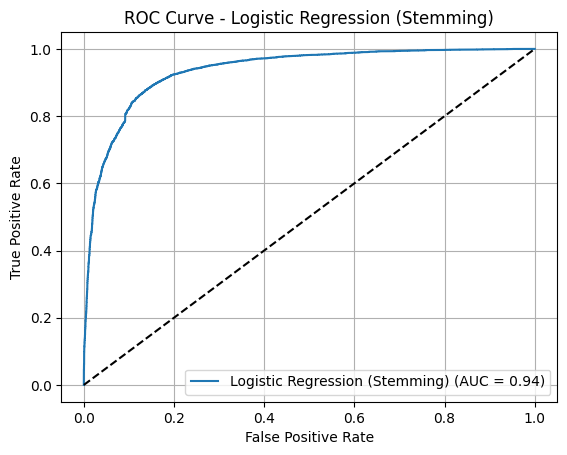

INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


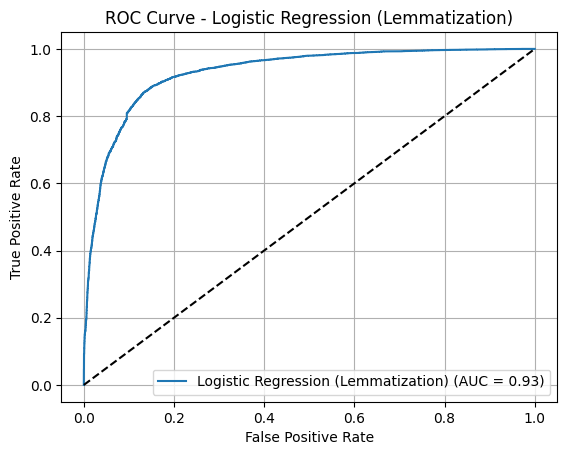

INFO:sklearnex: sklearn.svm.SVC.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.decision_function: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


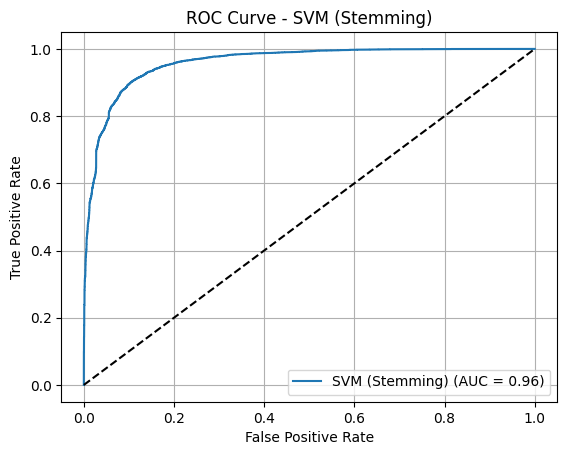

INFO:sklearnex: sklearn.svm.SVC.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.decision_function: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


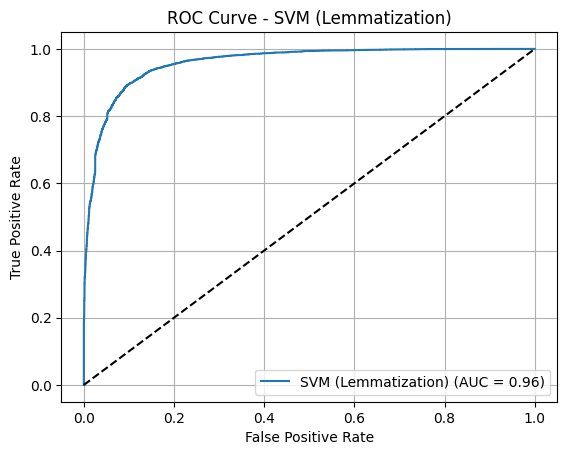

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict_proba: fallback to original Scikit-learn. All input data transferred to host for further backend computations.
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


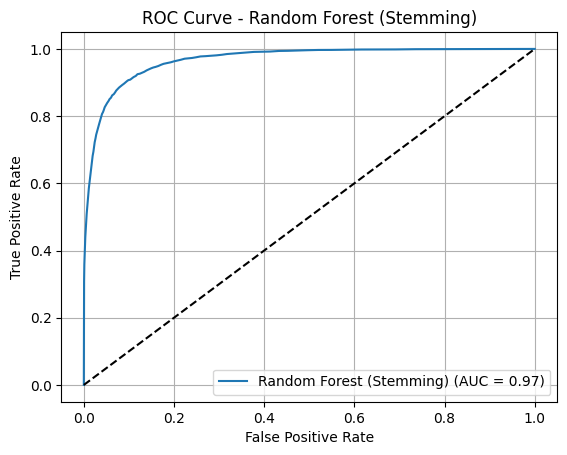

INFO:sklearnex: sklearn.ensemble.RandomForestClassifier.predict_proba: fallback to original Scikit-learn. All input data transferred to host for further backend computations.
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


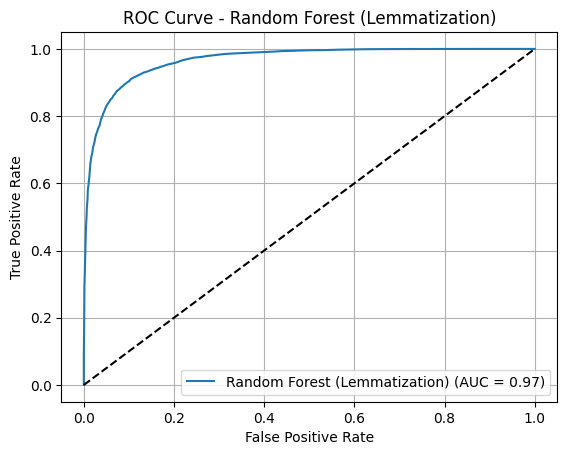

In [25]:

# ======================== 10. ROC Curves ========================

def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Fake)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {label}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc(lr_stem, X_test_stem, y_test, "Logistic Regression (Stemming)")
plot_roc(lr_lem, X_test_lem, y_test, "Logistic Regression (Lemmatization)")
plot_roc(svm_stem, X_test_stem, y_test, "SVM (Stemming)")
plot_roc(svm_lem, X_test_lem, y_test, "SVM (Lemmatization)")
plot_roc(rf_stem, X_test_stem, y_test, "Random Forest (Stemming)")
plot_roc(rf_lem, X_test_lem, y_test, "Random Forest (Lemmatization)")

INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.linear_model.LogisticRegression.predict_proba: fallback to original Scikit-learn
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.svm.SVC.decision_function: running accelerated version on CPU
INFO:sklearnex: sklearn.ut

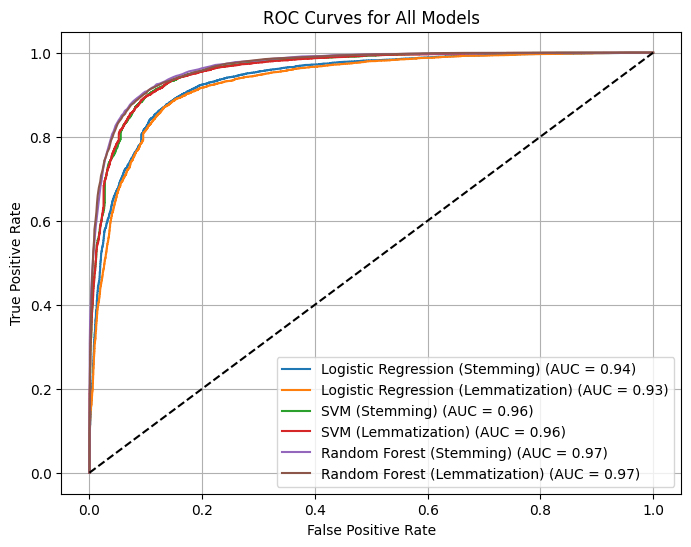

In [26]:
def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability for class 1 (Fake)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for all models on the same plot
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plot_roc(lr_stem, X_test_stem, y_test, "Logistic Regression (Stemming)")
plot_roc(lr_lem, X_test_lem, y_test, "Logistic Regression (Lemmatization)")
plot_roc(svm_stem, X_test_stem, y_test, "SVM (Stemming)")
plot_roc(svm_lem, X_test_lem, y_test, "SVM (Lemmatization)")
plot_roc(rf_stem, X_test_stem, y_test, "Random Forest (Stemming)")
plot_roc(rf_lem, X_test_lem, y_test, "Random Forest (Lemmatization)")

# Add diagonal line (random classifier line)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid()

# Display the plot
plt.show()


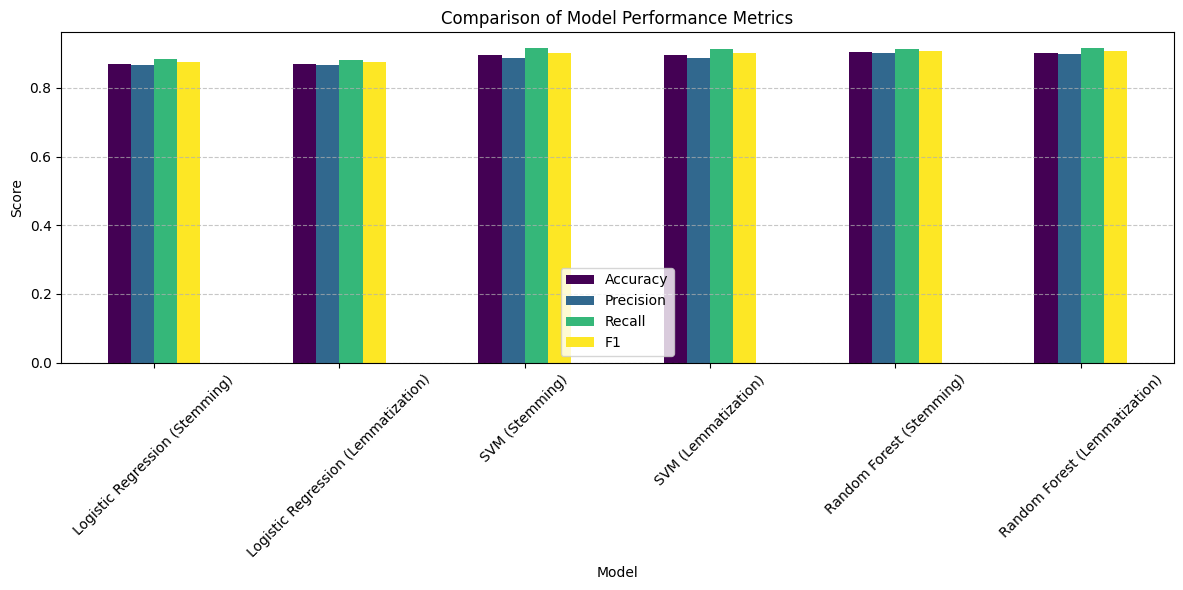

In [27]:
# Prepare model names and predictions
models = [
    "Logistic Regression (Stemming)", 
    "Logistic Regression (Lemmatization)", 
    "SVM (Stemming)", 
    "SVM (Lemmatization)", 
    "Random Forest (Stemming)", 
    "Random Forest (Lemmatization)"
]
predictions = [
    y_pred_lr_stem,
    y_pred_lr_lem,
    y_pred_svm_stem,
    y_pred_svm_lem,
    y_pred_rf_stem,
    y_pred_rf_lem
]

# Collect metrics in a list
metrics_list = []

for name, pred in zip(models, predictions):
    # Create a dictionary of scores for this model
    metrics_dict = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1': f1_score(y_test, pred)
    }
    metrics_list.append(metrics_dict)

# Convert list of dicts into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Set model names as index for plotting
metrics_df.set_index('Model', inplace=True)
# Plotting the comparison graph
metrics_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Create a list of model predictions and their names
model_predictions = [
    ("Logistic Regression (Stemming)", y_pred_lr_stem),
    ("Logistic Regression (Lemmatization)", y_pred_lr_lem),
    ("SVM (Stemming)", y_pred_svm_stem),
    ("SVM (Lemmatization)", y_pred_svm_lem),
    ("Random Forest (Stemming)", y_pred_rf_stem),
    ("Random Forest (Lemmatization)", y_pred_rf_lem),
]

# Loop through each model and create a heatmap for its classification report
for model_name, y_pred in model_predictions:
    # Generate classification report dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Convert the dictionary to a DataFrame
    report_df = pd.DataFrame(report).transpose()
    
    # Drop support and average rows for clean heatmap
    report_df = report_df.iloc[:-1, :-1]
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
    plt.title(f"Classification Report Heatmap - {model_name}", fontsize=13)
    plt.show()


In [ ]:
from sklearn.metrics import log_loss
import numpy as np

# Helper to compute train/test loss
def compute_and_plot_loss(model, X_train, X_test, y_train, y_test, model_name):
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    
    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)

    plt.figure(figsize=(6, 4))
    bars = plt.bar(['Train Loss', 'Test Loss'], [train_loss, test_loss], color=['skyblue', 'salmon'])
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + 0.15, yval + 0.01, f'{yval:.4f}', fontsize=12)
    plt.title(f'{model_name} - Train vs Test Loss')
    plt.ylabel("Log Loss")
    plt.ylim(0, max(train_loss, test_loss) + 0.2)
    plt.grid(axis='y')
    plt.show()

print("==== Plotting Train vs Test Loss for All Models ====")
# Logistic Regression
compute_and_plot_loss(lr_stem, X_train_stem, X_test_stem, y_train, y_test, "Logistic Regression (Stemming)")
compute_and_plot_loss(lr_lem, X_train_lem, X_test_lem, y_train, y_test, "Logistic Regression (Lemmatization)")

# SVM
compute_and_plot_loss(svm_stem, X_train_stem, X_test_stem, y_train, y_test, "SVM (Stemming)")
compute_and_plot_loss(svm_lem, X_train_lem, X_test_lem, y_train, y_test, "SVM (Lemmatization)")

# Random Forest
compute_and_plot_loss(rf_stem, X_train_stem, X_test_stem, y_train, y_test, "Random Forest (Stemming)")
compute_and_plot_loss(rf_lem, X_train_lem, X_test_lem, y_train, y_test, "Random Forest (Lemmatization)")


In [1]:
# ======================== 12. Predictive System Example ========================
X_new = ["PM Modi meets Air Chief Marshal AP Singh Amid India-Pakistan Tensions"]
X_new_transformed = vectorizer_stem.transform(X_new)
prediction = rf_stem.predict(X_new_transformed)

print("Prediction for new headline:", "Fake" if prediction[0] == 1 else "Real")

'PM Modi meets Air Chief Marshal AP Singh Amid India-Pakistan Tensions'

In [1]:
!pip install scikit-learn
import streamlit as st
import joblib

vectorizer = joblib.load("vectorizer_lem.joblib")
model = joblib.load("lr_lem_model.joblib")

st.title("Fake News Detector")
st.write("Enter a News Article below to check whether it is Fake or Real. ")

inputn = st.text_area("News Article:","")

if st.button("Check News"):
    if inputn.strip():
        transform_input = vectorizer.transform([inputn])
        prediction = model.predict(transform_input)

        if prediction[0] == 1:
            st.success("The News is Real! ")
        else:
            st.error("The News is Fake! ")
    else:
        st.warning("Please enter some text to Analyze. ")

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier